In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os
import sys
sys.path.append('..')
from field import read_csv, plot_overview

In [2]:
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?
# path = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/vesterbrogade130623/' # Path to data located on L: drive
path_vesterbrogade = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Vesterbrogade_2023/' # Path to data located on L: drive

vesterbrogade = read_csv(path_vesterbrogade, parent_path)

display(vesterbrogade)

c:\Users\B363580\Documents\GitHub\NFA_project\field.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sum'] = df[df.keys()[2:]].sum(axis='columns')


{'EPA-vesterbrogade-120623':                                     t_base  m252_11000  m228_11000  \
 Time                                                                 
 0 days 07:49:25  6/12/2023 07:49:25.701635    0.003833    0.007104   
 0 days 07:50:05  6/12/2023 07:50:05.703749    0.000467    0.002949   
 0 days 07:50:45  6/12/2023 07:50:45.705862    0.001393    0.006051   
 0 days 07:51:25  6/12/2023 07:51:25.707975   -0.000745    0.002245   
 0 days 07:52:05  6/12/2023 07:52:05.710088    0.001336    0.009507   
 ...                                    ...         ...         ...   
 0 days 11:34:37  6/12/2023 11:34:37.782845    0.000913    0.000942   
 0 days 11:35:17  6/12/2023 11:35:17.784958    0.001047    0.001154   
 0 days 11:35:57  6/12/2023 11:35:57.787071    0.001042    0.001799   
 0 days 11:36:37  6/12/2023 11:36:37.789184    0.001940    0.000833   
 0 days 11:37:17  6/12/2023 11:37:17.791297    0.000197    0.000283   
 
                  m226_11000  m216_11000  m202_

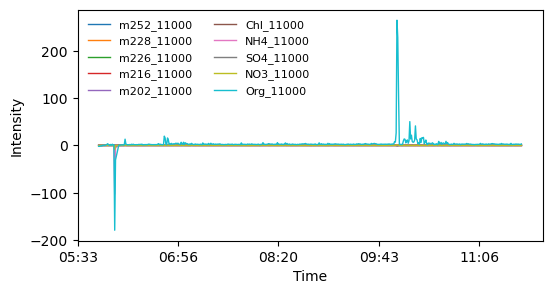

In [3]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.savefig('Field_data/EPA_vesterbrogade_130623.png', dpi = 600)

C:\Users\B363580\AppData\Local\Temp\ipykernel_15760\3462980668.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peak = peak[after_mask]


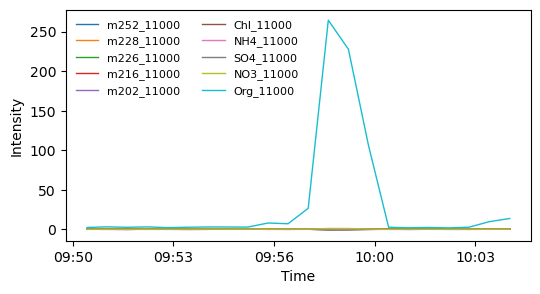

In [9]:
before_mask = vesterbrogade['EPA-vesterbrogade-130623']['t_base'] > '6/13/2023 09:50:00'
after_mask = vesterbrogade['EPA-vesterbrogade-130623']['t_base'] < '6/13/2023 10:05:00'

peak = vesterbrogade['EPA-vesterbrogade-130623'][before_mask]
peak = peak[after_mask]

# Figure out how to flip dataframe to make a plot of intensity vs m/z value

fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, peak, 2)

fig.savefig('Field_data/EPA_vesterbrogade_130623_peak.png', dpi = 600)